Dataset Info :
  Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

## Importing Libraries 📚 📥

Install the libraries we will need along the way.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

## Importing Dataset 📑 ⬅️

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
data = data.drop(['id','Unnamed: 32'], axis = 1)

In [6]:
# Convert to DataFrames, id column excluded
x = data.iloc[:,1:]
y = data.diagnosis

In [7]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [9]:
col = x.columns

In [10]:
col

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Data Analysis 📊🔍

First analyze the dataset to look for imbalances and to get information on the different features and their importance.

### Distribution of Diagnoses

In [11]:
B, M = y.value_counts()
print('Benign: ',B)
print('Malignant : ',M)

Benign:  357
Malignant :  212


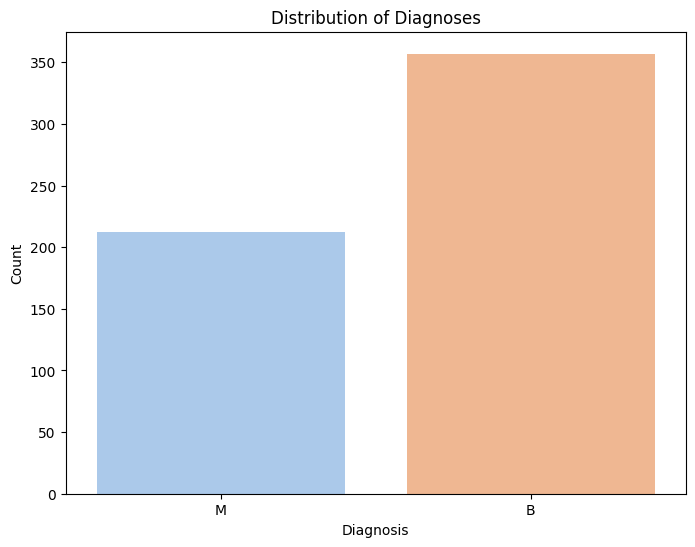

In [12]:
#Show the values for each target class
# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data, palette='pastel')
plt.title('Distribution of Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [13]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Pairplot

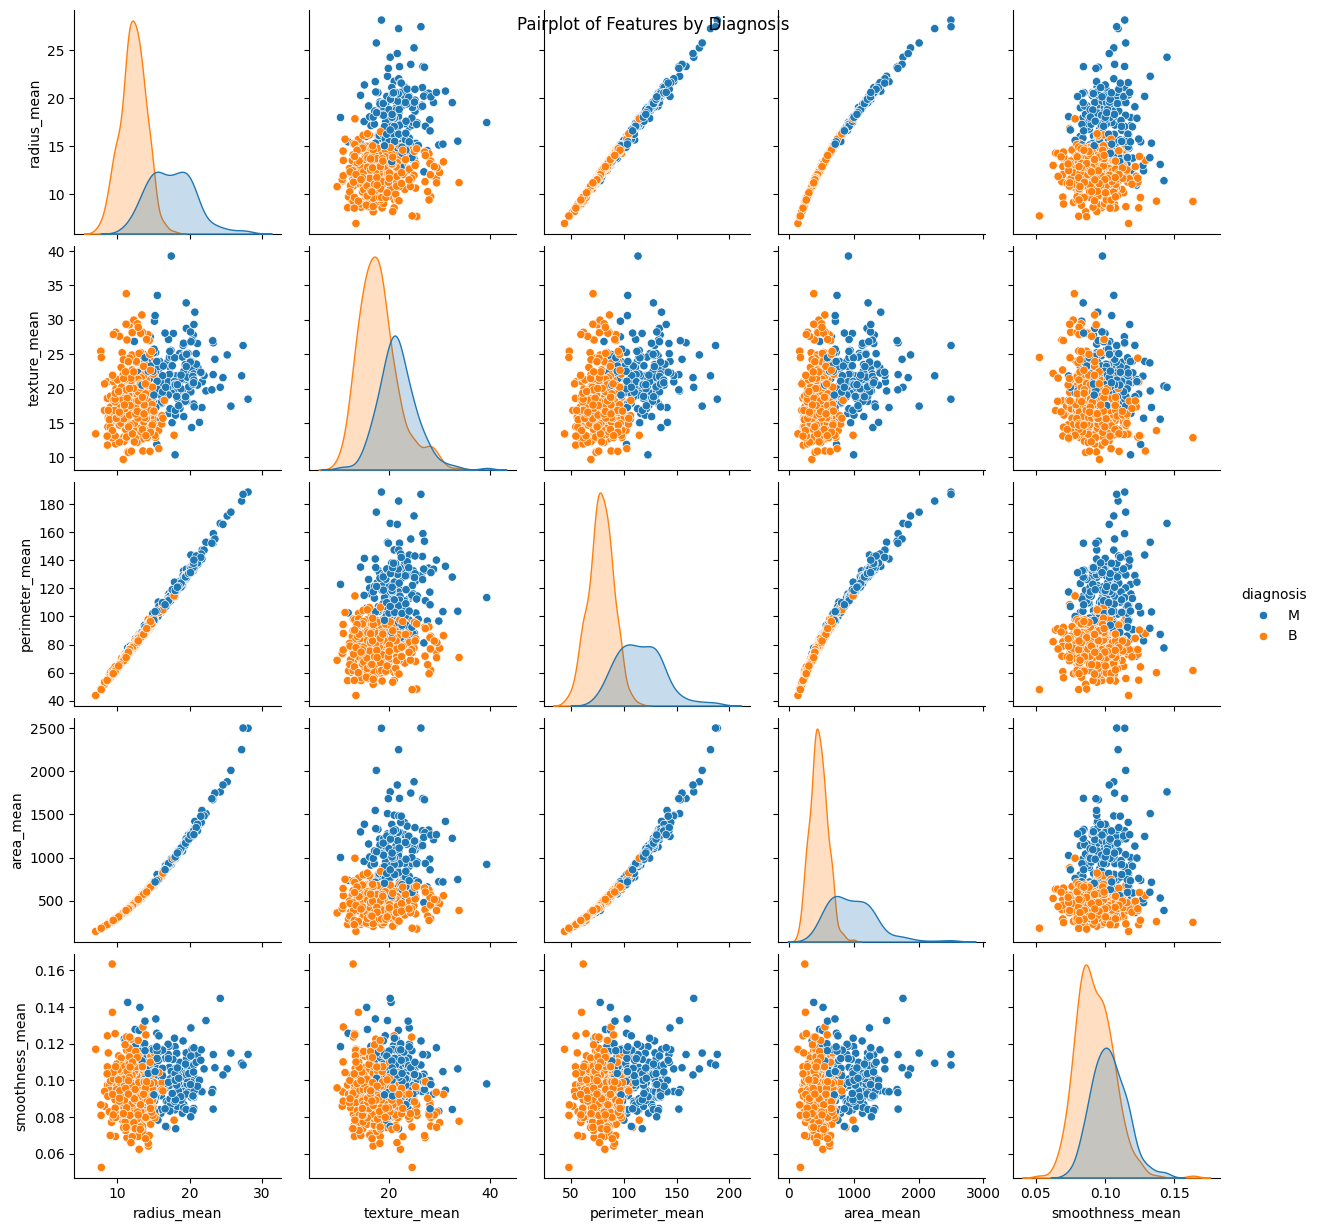

In [14]:
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean',
                                          'area_mean', 'smoothness_mean'])
plt.suptitle('Pairplot of Features by Diagnosis')
plt.show()

Malignant tumors tend to have higher values in features like radius_mean, perimeter_mean, and area_mean compared to Benign tumors.

### Distribution Plot

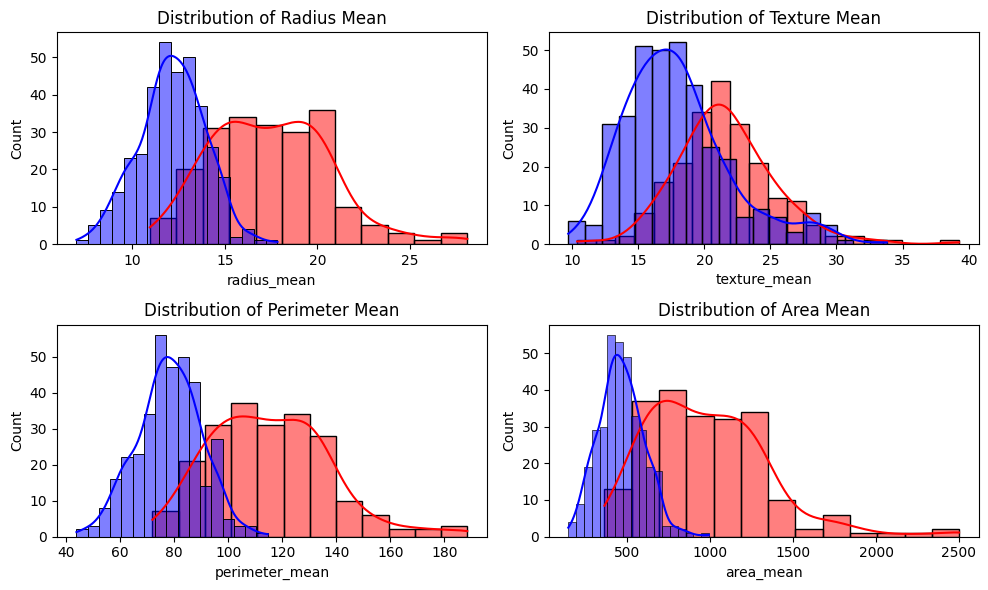

In [15]:
# Distribution plots for some features
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
# Plotting distribution of radius_mean for Malignant and Benign tumors
sns.histplot(data[data['diagnosis'] == 'M']['radius_mean'], kde=True, color='red', label='Malignant', alpha=0.5)
sns.histplot(data[data['diagnosis'] == 'B']['radius_mean'], kde=True, color='blue', label='Benign', alpha=0.5)
plt.title('Distribution of Radius Mean')

plt.subplot(2, 2, 2)
# Plotting distribution of radius_mean for Malignant and Benign tumors
sns.histplot(data[data['diagnosis'] == 'M']['texture_mean'], kde=True, color='red', label='Malignant', alpha=0.5)
sns.histplot(data[data['diagnosis'] == 'B']['texture_mean'], kde=True, color='blue', label='Benign', alpha=0.5)
plt.title('Distribution of Texture Mean')

plt.subplot(2, 2, 3)
# Plotting distribution of radius_mean for Malignant and Benign tumors
sns.histplot(data[data['diagnosis'] == 'M']['perimeter_mean'], kde=True, color='red', label='Malignant', alpha=0.5)
sns.histplot(data[data['diagnosis'] == 'B']['perimeter_mean'], kde=True, color='blue', label='Benign', alpha=0.5)
plt.title('Distribution of Perimeter Mean')

plt.subplot(2, 2, 4)
# Plotting distribution of radius_mean for Malignant and Benign tumors
sns.histplot(data[data['diagnosis'] == 'M']['area_mean'], kde=True, color='red', label='Malignant', alpha=0.5)
sns.histplot(data[data['diagnosis'] == 'B']['area_mean'], kde=True, color='blue', label='Benign', alpha=0.5)
plt.title('Distribution of Area Mean')

plt.tight_layout()
plt.show()


###Correlation Matrix

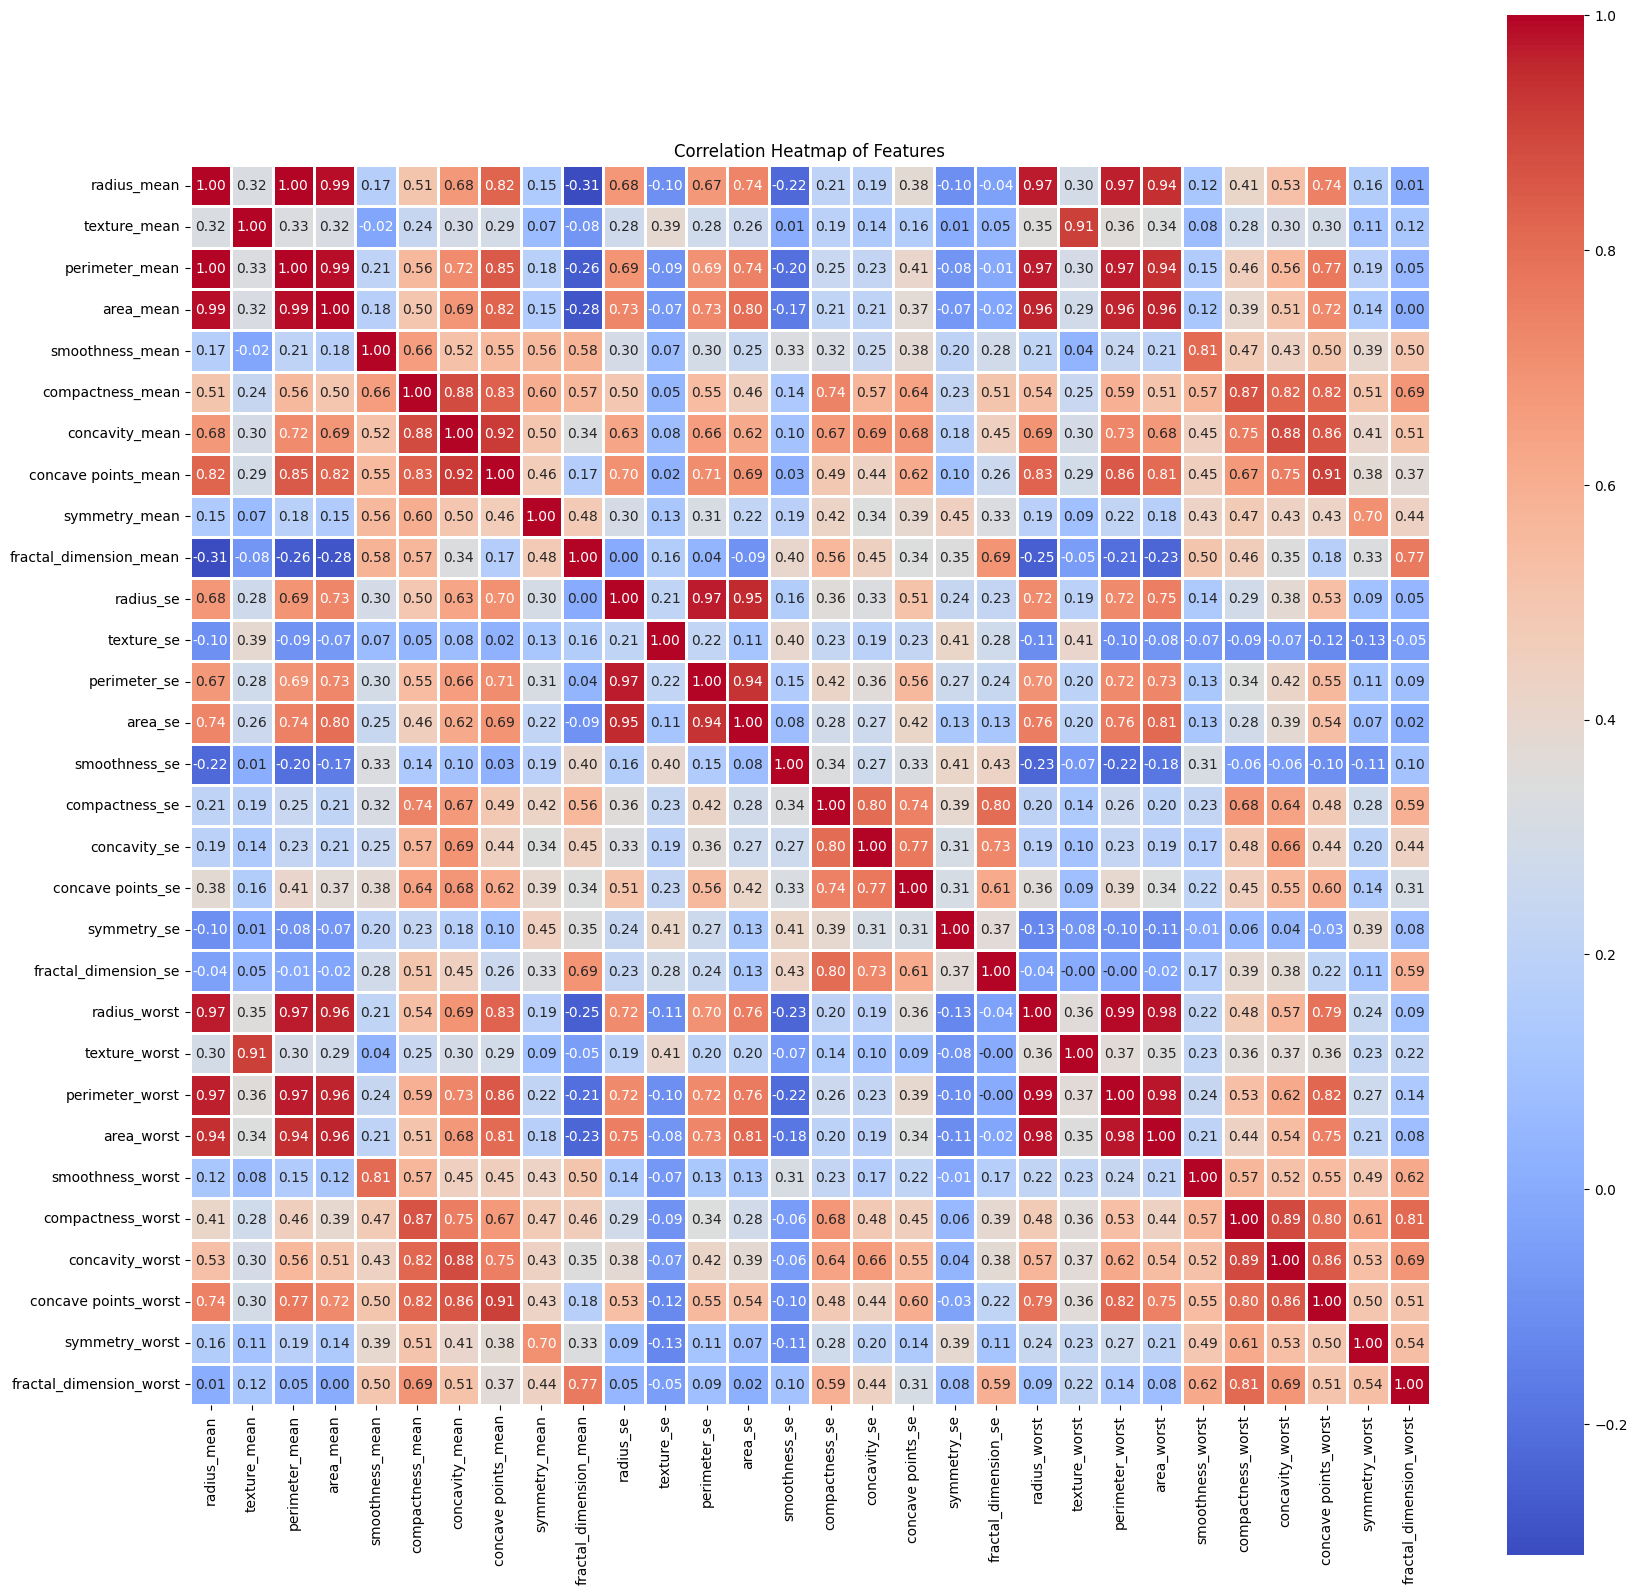

In [16]:
# Compute the correlation matrix
correlation_matrix = x.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt= '.2f', linewidths = 1)
plt.title('Correlation Heatmap of Features')
plt.show()


There are strong correlations between:


1.   radius_mean, perimeter_mean and area_mean
2.   compactness_mean, concavity_mean and concave points_mean
4.   Texture worst and texture mean
5.   Area worst, area se and area mean
6.   Concavity worst and concavity mean
7.   Smoothness worst and smoothness mean

For each strong correlation 1 feature is chosen.



In [17]:
drop_list = ['radius_mean','compactness_mean','radius_se',
              'perimeter_se','radius_worst','perimeter_worst','compactness_worst',
              'compactness_se','concave points_se','texture_worst', 'perimeter_worst', 'area_worst', 'area_mean', 'concave points_mean']
x_c = x.drop(drop_list, axis = 1)

In [18]:
x_c.head()

,texture_mean,perimeter_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,122.80,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.1625,0.2364,0.07678


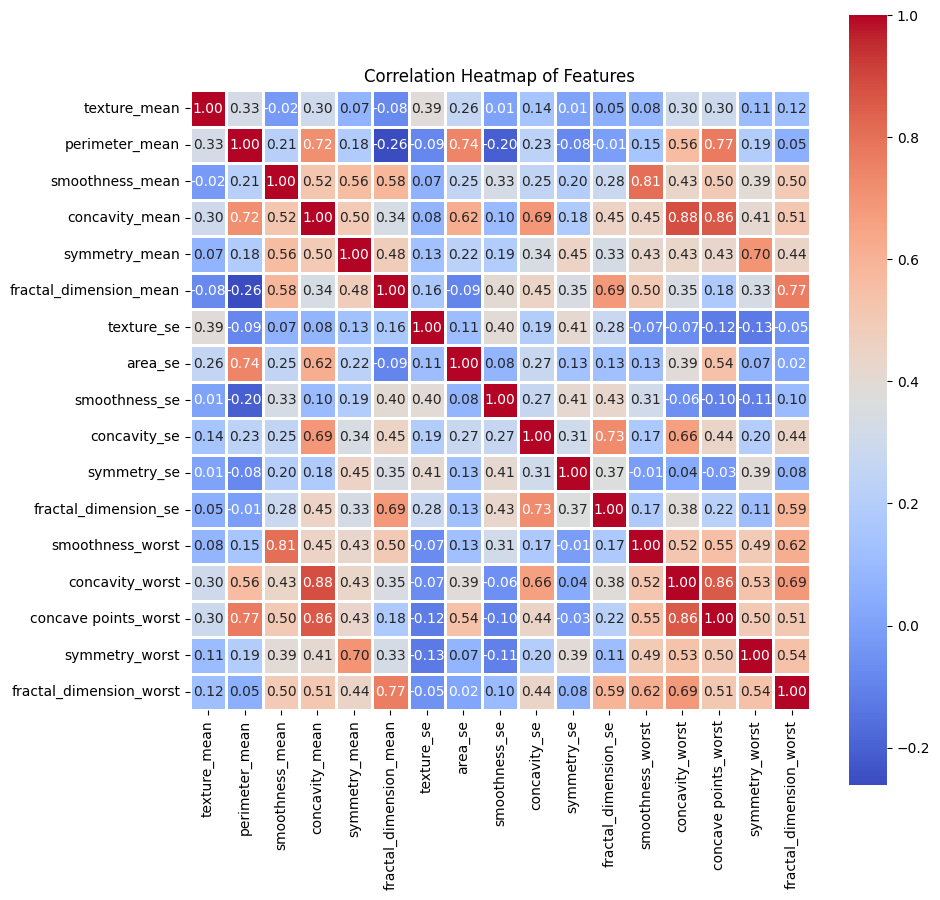

In [19]:
# Compute the correlation matrix
correlation_matrix = x_c.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt= '.2f', linewidths = 1)
plt.title('Correlation Heatmap of Features')
plt.show()

## Final Dataset 📋✅

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Text(0, 0.5, 'explained_variance_ratio_')

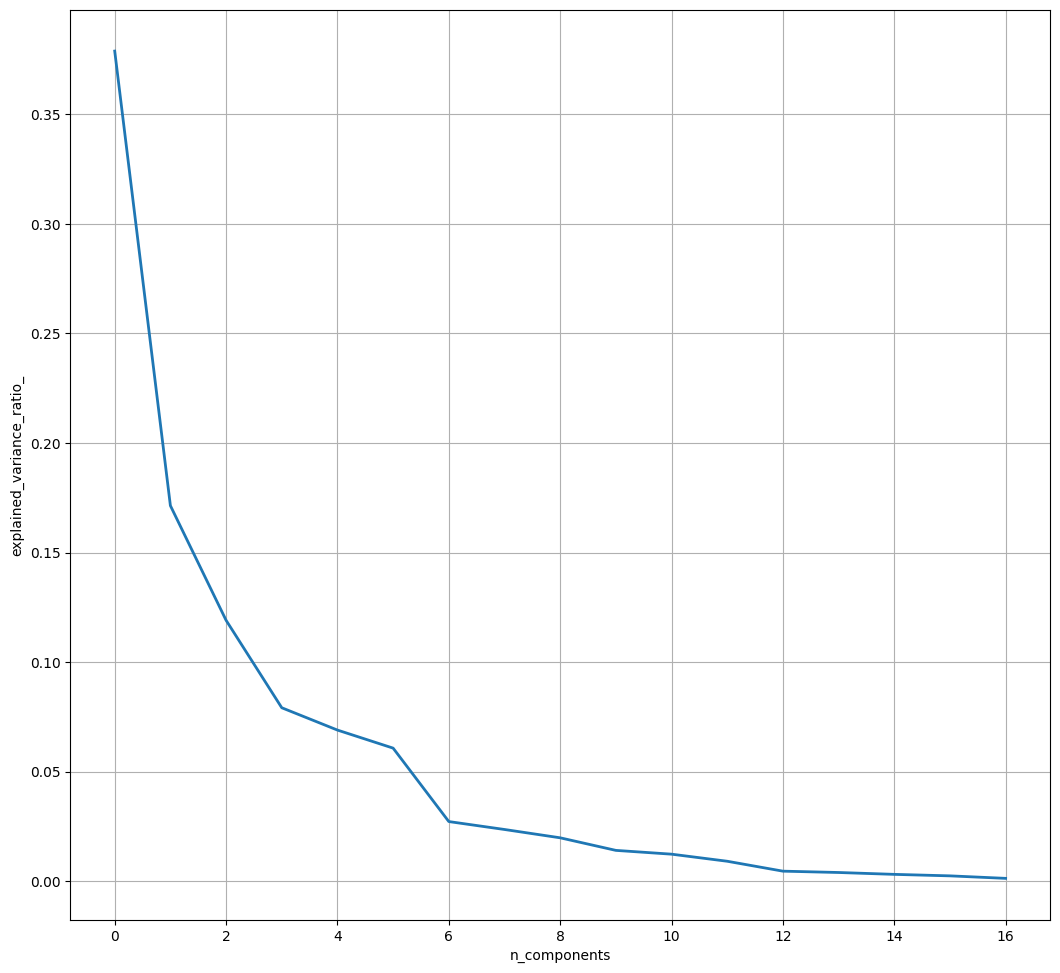

In [21]:
sc = StandardScaler()
x_sc = sc.fit_transform(x_c)

pca = PCA()
x_pca = pca.fit_transform(x_sc)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.grid(True)  # Add grid lines
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

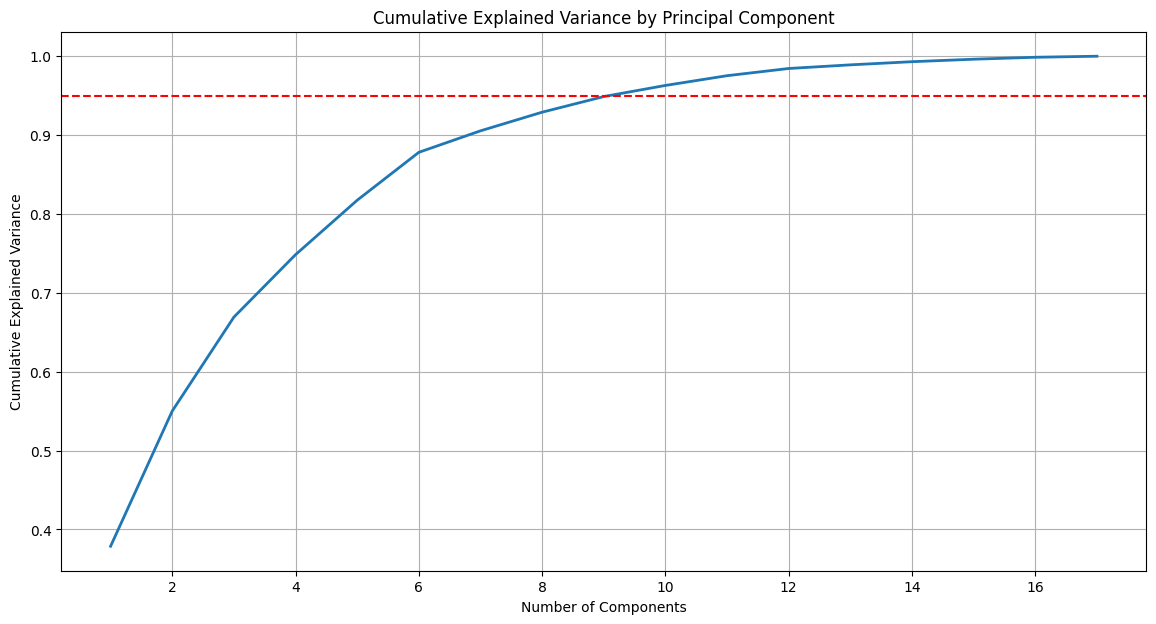

In [22]:
# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(14, 7))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% explained variance threshold
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Component')
plt.grid(True)
plt.show()

In [23]:
# Determine the number of components to explain at least 95% of variance
desired_variance = 0.95
num_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f'Number of components to explain {desired_variance * 100}% variance: {num_components}')

# Retrieve the principal components
pca = PCA(n_components=num_components)
x_pca = pca.fit_transform(x_sc)

# Display the components and their contribution
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=pd.DataFrame(x_c).columns, columns=[f'PC{i+1}' for i in range(num_components)])
print(feature_contributions)

# The new dataset with selected principal components
print(x_pca)

Number of components to explain 95.0% variance: 10
                              PC1       PC2       PC3       PC4       PC5  \
texture_mean             0.102520  0.163051  0.303074 -0.058906 -0.002125   
perimeter_mean           0.189022  0.454436  0.167216 -0.074992 -0.063941   
smoothness_mean          0.278909 -0.106989 -0.180472 -0.250051 -0.388066   
concavity_mean           0.351446  0.182353  0.130775  0.086430 -0.011050   
symmetry_mean            0.271626 -0.110922 -0.068760 -0.368229  0.259333   
fractal_dimension_mean   0.243248 -0.384144 -0.129743  0.151353 -0.037885   
texture_se               0.044996 -0.211197  0.486121 -0.180482 -0.072052   
area_se                  0.180486  0.288273  0.316131 -0.161593 -0.170924   
smoothness_se            0.096943 -0.354200  0.245598 -0.124624 -0.430658   
concavity_se             0.266824 -0.079764  0.245606  0.380691  0.166653   
symmetry_se              0.124774 -0.283284  0.268809 -0.376452  0.367426   
fractal_dimension_se     

Feature ranking:
1. Feature concave points_worst (0.2980860754991811)
2. Feature area_se (0.1396894479255937)
3. Feature perimeter_mean (0.13550087633049432)
4. Feature concavity_mean (0.12095170686394313)
5. Feature concavity_worst (0.09401850391306307)
6. Feature texture_mean (0.04416531565760469)
7. Feature smoothness_worst (0.03309356104951112)
8. Feature concavity_se (0.028148426523454947)
9. Feature symmetry_worst (0.016580289170033874)
10. Feature fractal_dimension_mean (0.01618719989635805)
11. Feature smoothness_mean (0.012722849389561664)
12. Feature fractal_dimension_se (0.0123022035614358)
13. Feature fractal_dimension_worst (0.011615651762832158)
14. Feature symmetry_se (0.010773055202265349)
15. Feature smoothness_se (0.009699373252052924)
16. Feature texture_se (0.008451873649480782)
17. Feature symmetry_mean (0.008013590353133402)


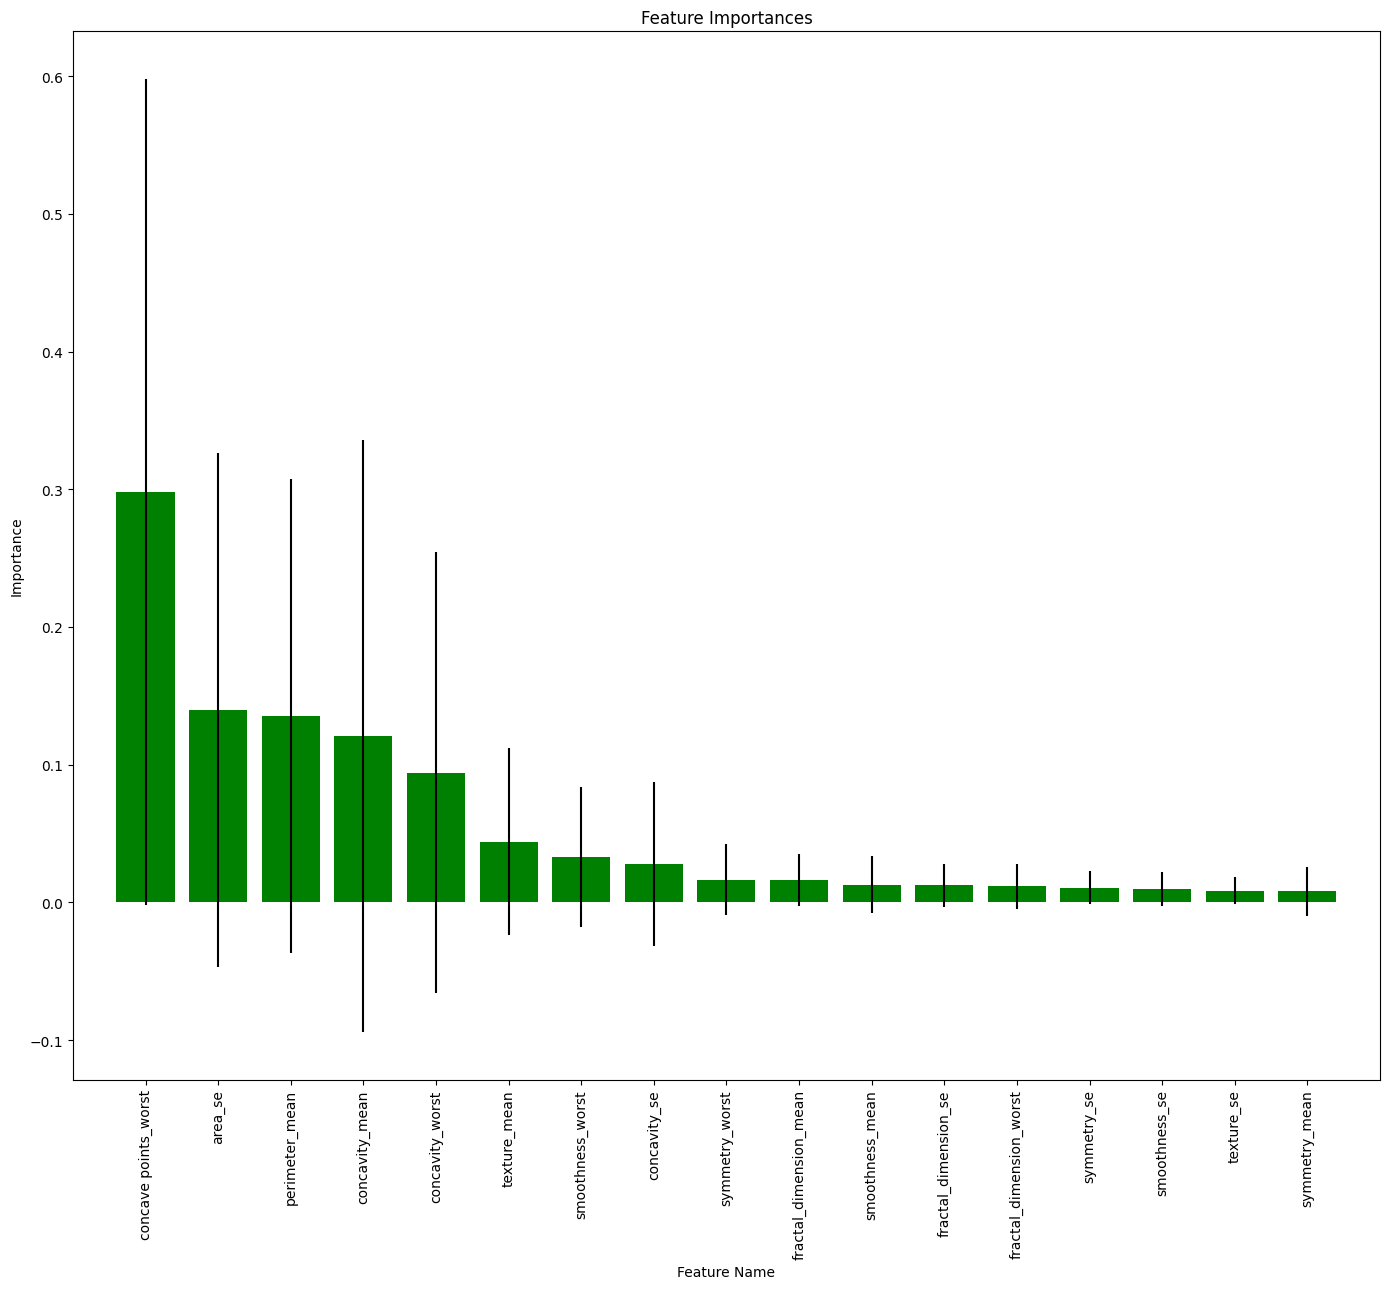

In [24]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_c, y)

# Get feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

# Get feature names
feature_names = np.array(x_c.columns)  # Replace with actual feature names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(x_c.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plot feature importances
plt.figure(figsize=(14, 13))
plt.title("Feature Importances")
plt.bar(range(x_c.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(x_c.shape[1]), feature_names[indices], rotation=90)  # Rotate labels for better readability
plt.xlim([-1, x_c.shape[1]])
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## Model Training and Testing 🤖🎯



In [ ]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Data from correlation was used cause it gave better results with the features it had compared to those of pca and random forest classifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [3]:
from sklearn.model_selection import train_test_split

sc = StandardScaler()
x_sc = sc.fit_transform(x_c)

ddata = x_sc

# y = y.map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test = train_test_split(ddata, y, test_size = 0.3, random_state = 0)

NameError: name 'StandardScaler' is not defined

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

Accuracy: 0.97
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



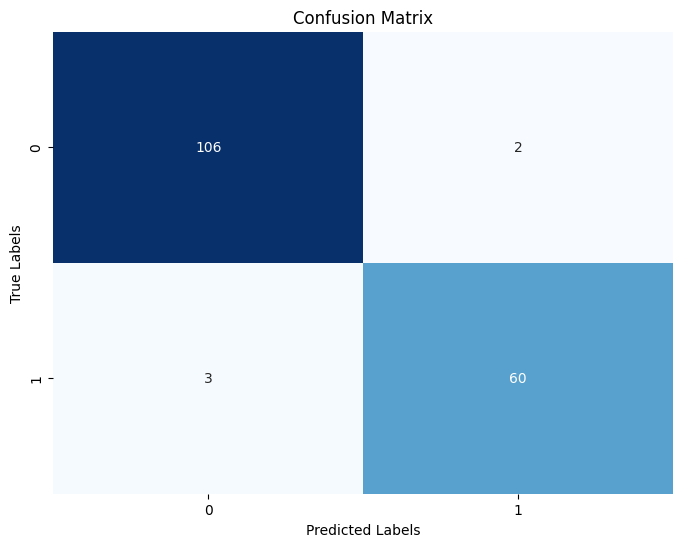

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Compute and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))  # For all models
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machine (SVM)

In [245]:
SVM_model = SVC(kernel= 'poly',degree=1, C=2)
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)

Accuracy: 0.97
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



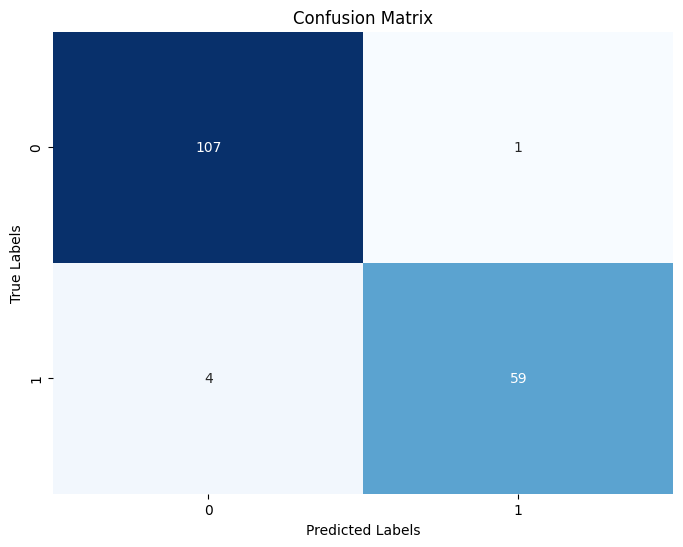

In [246]:
# Compute and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classification

In [ ]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [194]:
RF_model = RandomForestClassifier(n_estimators=100, criterion='log_loss')
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

Accuracy: 0.95
              precision    recall  f1-score   support

           B       0.95      0.96      0.96       108
           M       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



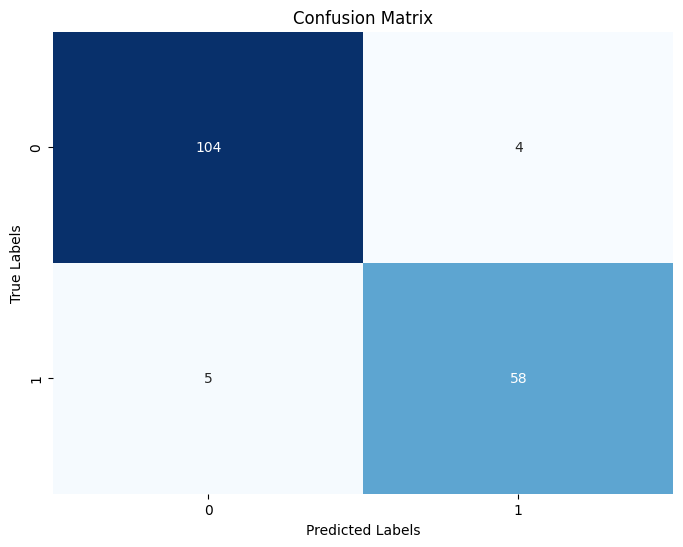

In [195]:
# Compute and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

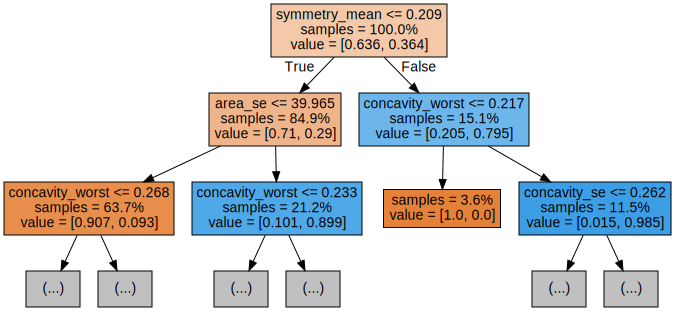

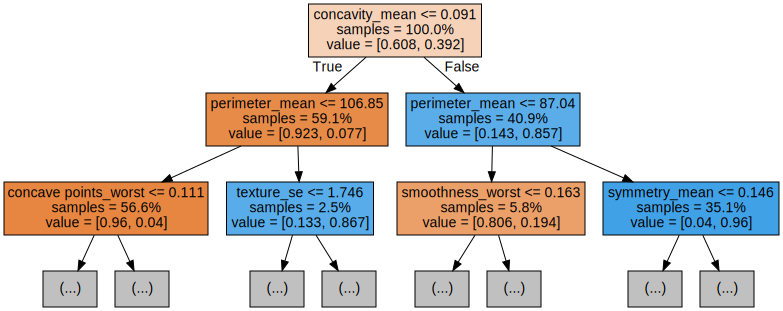

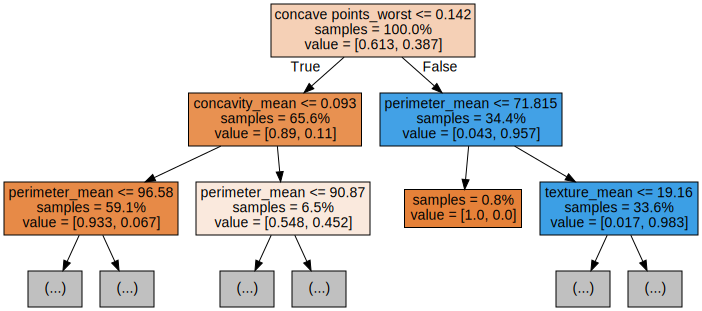

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_c.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### XGBoost (eXtreme Gradient Boosting)

In [291]:
#Used GridSearch with different 
y_train_01 = y_train.replace({'B': 0, 'M': 1})
xg_model = xgb.XGBClassifier(n_estimators= 100, learning_rate=0.47)
xg_model.fit(X_train, y_train_01)

y_pred = xg_model.predict(X_test)

Accuracy: 0.99
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       108
           M       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



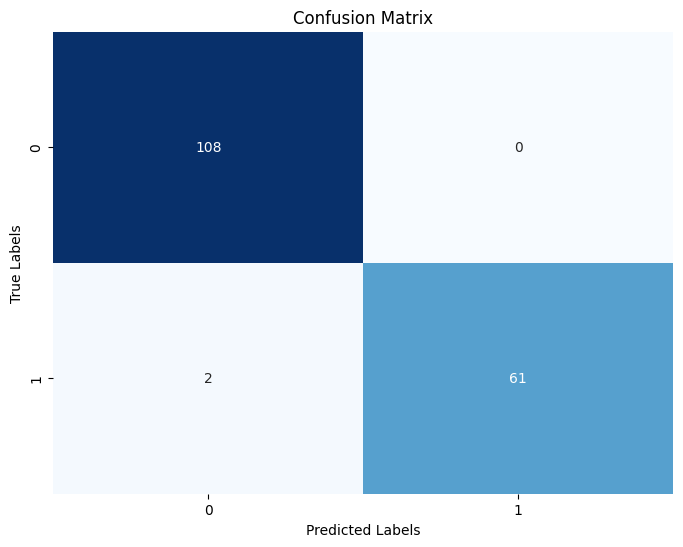

In [292]:
# Compute and print accuracy score
y_pred = np.where(y_pred == 0, 'B', 'M')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()